# Multi TLE testing

This notebook is for the purposes of testing the `MultiTLE` class implementation for obtaining latitude-longitude positions for satellites at arbitrary times

In [18]:
from skyfield.api import Timescale, load, wgs84
from ssncs.multi_tle import MultiTLE

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import cartopy.crs as ccrs
import cmcrameri.cm as cm

In [10]:
ts = load.timescale()

In [11]:
icesat = MultiTLE.from_json_file("../data/icesat2_test.json", ts=ts)
icesat

In [12]:
np.array([
    es.epoch.astimezone(dt.timezone.utc)
    for es in icesat.tles
])

array([datetime.datetime(2024, 5, 28, 13, 7, 41, 460960, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 28, 20, 58, 51, 571200, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 29, 14, 15, 25, 246944, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 29, 20, 32, 20, 929056, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 29, 22, 6, 34, 831872, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 30, 13, 48, 53, 461728, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 30, 21, 40, 2, 469504, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 31, 3, 56, 57, 544224, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 31, 13, 22, 19, 831008, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 6, 1, 1, 56, 22, 801344, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 6, 1, 11, 22, 7, 975488, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024

In [13]:
datetimes = pd.date_range(
    start=icesat.epochs[0],
    end=icesat.epochs[-1],
    freq="60s",
    tz=dt.timezone.utc,
).to_pydatetime()
datetimes

array([datetime.datetime(2024, 5, 28, 13, 7, 41, 460960, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 28, 13, 8, 41, 460960, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 28, 13, 9, 41, 460960, tzinfo=datetime.timezone.utc),
       ...,
       datetime.datetime(2024, 6, 3, 21, 28, 41, 460960, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 6, 3, 21, 29, 41, 460960, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 6, 3, 21, 30, 41, 460960, tzinfo=datetime.timezone.utc)],
      shape=(9144,), dtype=object)

In [14]:
icesat_lon_lat = icesat.get_lon_lat_at_datetimes(
    datetimes=datetimes,
    ts=ts
)

In [15]:
icesat_lon_lat

(array([-88.69273448, -89.0767353 , -89.46207854, ..., 101.29162797,
        100.90539807, 100.52101323], shape=(9144,)),
 array([ 0.38335715,  4.21786163,  8.05280064, ..., -9.83385336,
        -6.00269626, -2.16997143], shape=(9144,)))

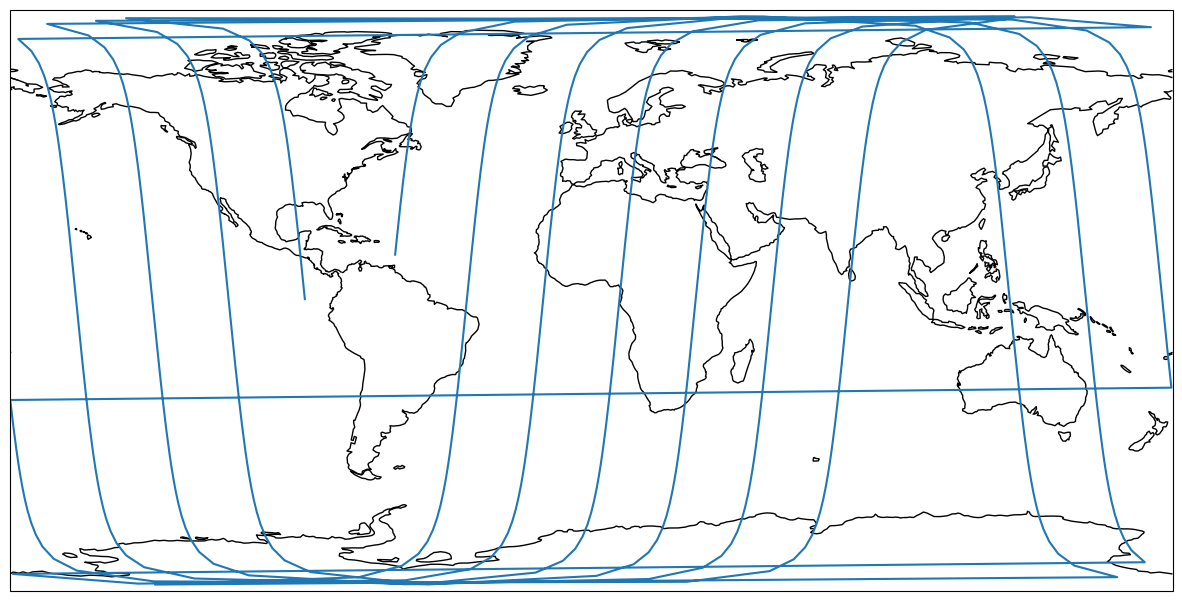

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15,8), subplot_kw=dict(projection=ccrs.PlateCarree()))

lon_slice = icesat_lon_lat[0][:610]
lat_slice = icesat_lon_lat[1][:610]

#ax.scatter(lon_slice, lat_slice, s=10)
ax.plot(lon_slice, lat_slice)
ax.coastlines()

plt.show()

In [17]:
icesat_positions = icesat.propogate_to_datetimes(
    datetimes=datetimes,
    ts=ts
)
icesat_positions

[<Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 target=-143613>,
 <Geocentric ICRS position and velocity at date t center=399 tar

In [39]:
wgs84.subpoint_of(icesat_positions[0])

<GeographicPosition WGS84 latitude [-4.0082e-05 +3.8396e+00 ... +5.7107e+00 +1.8639e+00] N longitude [  5.8667   5.4826 ... 127.4495 127.0647] E elevation 0.0 m>